In [1]:
import random
random.seed(123456)

In [2]:
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

In [3]:
n = 1000
p = 4
X = np.reshape(np.random.uniform(0,1,n*p), (n,p))
W = binom.rvs(1, p=0.5, size=n)  # independent from X and Y
Y = 0.5*(X[:,0] - 0.5) + (X[:,1] - 0.5)*W + 0.1*norm.rvs(size=n)

In [4]:
y_norm = 1 - (Y - min(Y))/(max(Y) - min(Y)) # just for plotting

Text(0, 0.5, 'x2')

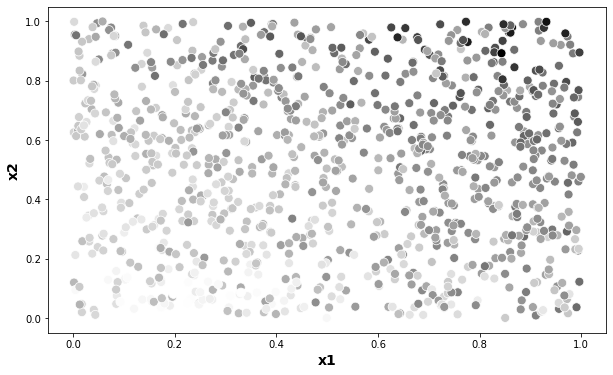

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], 
                y=X[:,1],
                hue = -y_norm,
                s=80,
                data=X,
               palette="Greys").legend_.remove()
plt.xlabel("x1",
            fontweight ='bold', 
            size=14)
plt.ylabel("x2", 
            fontweight ='bold',
            size=14)

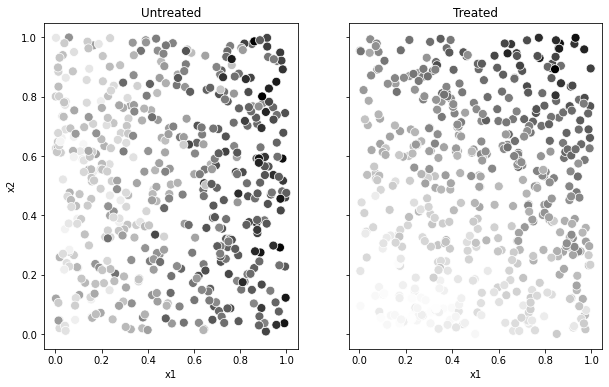

In [6]:
f, axs = plt.subplots(1,2,
                      figsize=(10,6),
                      sharey=True)
for i in range(0,2):
    aa = ["Untreated", "Treated"]
    globals()[f"ax{i}"] = sns.scatterplot(x=X[W==i,0],
                                        y=X[W==i,1],
                                        hue = -y_norm[W==i],
                                       ax=axs[i],
                                        s = 80,
                                       palette="Greys")
    globals()[f"ax{i}"].set(title=aa[i])
    globals()[f"ax{i}"].legend_.remove()
    globals()[f"ax{i}"].set(xlabel='x1', ylabel='x2')

Text(0.65, 0.7, 'TREAT (A)')

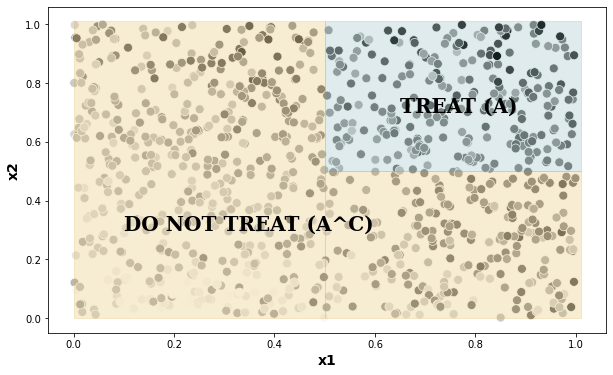

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], 
                y=X[:,1],
                hue = -y_norm,
                s=80,
                data=X,
               palette="Greys").legend_.remove()
plt.xlabel("x1",
            fontweight ='bold', 
            size=14)
plt.ylabel("x2", 
            fontweight ='bold',
            size=14)

plt.fill_between((0, 0.5), (1.01), 0,
                 facecolor="orange", # The fill color
                 color='goldenrod',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.fill_between((0.5,1.01), (0.5), 0,
                 facecolor="orange", # The fill color
                 color='goldenrod',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.fill_between((0.5,1.01), (1.01), (0.5),
                 facecolor="orange", # The fill color
                 color='cadetblue',       # The outline color
                 alpha=0.2)          # Transparency of the fill
font = {'family': 'serif',
        'color':  'BLACK',
        'weight': 'bold',
        'size': 20
        }
plt.text(0.1,0.3, 'DO NOT TREAT (A^C)', fontdict=font)
plt.text(0.65,0.7, 'TREAT (A)', fontdict=font)

In [8]:
# Only valid in randomized setting.
A = (X[:,0] > 0.5) & (X[:,1] > 0.5)
value_estimate = np.mean(Y[A & (W==1)]) * np.mean(A) + np.mean(Y[A!=1 & (W==0)]) * np.mean(A != 1)
value_stderr = np.sqrt(np.var(Y[A & (W==1)]) / sum(A & (W==1)) * np.mean(A**2) + np.var(Y[A!=1 & (W==0)]) / sum(A!=1 & (W==0)) * np.mean(A!=1**2))
print(f"Value estimate:", value_estimate, "Std. Error", value_stderr)

Value estimate: 0.13760453396306346 Std. Error 0.013397448906573163


In [9]:
# Only valid in randomized setting.
p = 0.75 # for example
value_estimate = p * np.mean(Y[W==1]) + (1-p) * np.mean(Y[W==0]) 
value_stderr = np.sqrt(np.var(Y[W==1]) / sum(W==1) * p**2 + np.var(Y[W==0]) / sum(W==0))
print(f"Value estimate:", value_estimate, "Std. Error", value_stderr)

Value estimate: 0.002476717257307943 Std. Error 0.013905654227644169


In [10]:
# Only valid in randomized settings.
A = (X[:,0] > 0.5) & (X[:,1] > 0.5)
diff_estimate = (np.mean(Y[A & (W==1)]) - np.mean(Y[A & (W==0)])) * np.mean(A)
diff_stderr = np.sqrt(np.var(Y[A & (W==1)]) / sum(A & (W==1)) + np.var(Y[A & (W==0)]) / sum(A & W==0)) * np.mean(A)**2
print(f"Difference estimate:", diff_estimate, "Std. Error:", diff_stderr)

Difference estimate: 0.061283288822524006 Std. Error: 0.001178977546329498


In [11]:
# Only valid in randomized settings.
A = (X[:,0] > 0.5) & (X[:,1] > 0.5)
diff_estimate = (np.mean(Y[A & (W==1)]) - np.mean(Y[A & (W==0)])) * np.mean(A) / 2 + (np.mean(Y[A!=1 & (W==0)]) - np.mean(Y[A!=1 & (W==1)])) * np.mean(A!=1) / 2
diff_stderr = np.sqrt((np.mean(A)/2)**2 * (np.var(Y[A & (W==1)])/sum(A & (W==1)) + np.var(Y[A & (W==0)])/sum(A & (W==0))) + (np.mean(A!=1)/2)**2 * (np.var(Y[A!=1 & (W==1)])/sum(A!=1 & (W==1)) + np.var(Y[A!=1 & (W==0)])/sum(A!=1 & (W==0))))
print(f"Difference estimate:", diff_estimate, "Std. Error:", diff_stderr)

Difference estimate: 0.07481266676896872 Std. Error: 0.006816663401738645


In [12]:
# An "observational" dataset satisfying unconfoundedness and overlap.
n = 1000
p = 4
X = np.reshape(np.random.uniform(0,1,n*p), (n,p))
e = 1/(1+np.exp(-2*(X[:,0]-.5)-2*(X[:,1]-.5)))  # not observed by the analyst.
W = binom.rvs(1, p=e, size=n)  
Y = 0.5*(X[:,0] - 0.5) + (X[:,1] - 0.5)*W + 0.1*norm.rvs(size=n)

In [13]:
y_norm = (Y - min(Y))/(max(Y) - min(Y))

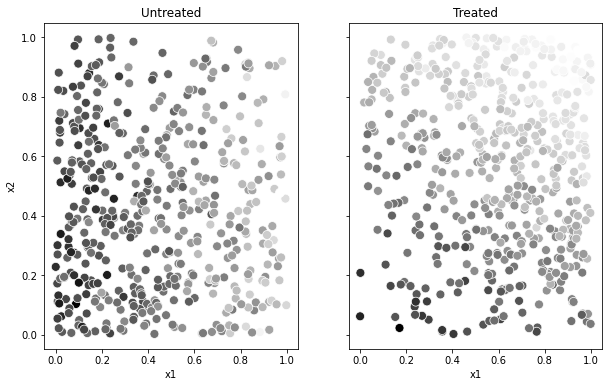

In [14]:
f, axs = plt.subplots(1,2,
                      figsize=(10,6),
                      sharey=True)
for i in range(0,2):
    aa = ["Untreated", "Treated"]
    globals()[f"ax{i}"] = sns.scatterplot(x=X[W==i,0],
                                        y=X[W==i,1],
                                        hue = -y_norm[W==i],
                                       ax=axs[i],
                                        s = 80,
                                       palette="Greys")
    globals()[f"ax{i}"].set(title=aa[i])
    globals()[f"ax{i}"].legend_.remove()
    globals()[f"ax{i}"].set(xlabel='x1', ylabel='x2')

In [15]:
# !pip install econml

In [16]:
import econml
# Main imports
from econml.orf import DMLOrthoForest, DROrthoForest
from econml.dml import CausalForestDML
from econml.sklearn_extensions.linear_model import WeightedLassoCVWrapper, WeightedLasso, WeightedLassoCV
from sklearn.linear_model import MultiTaskLassoCV
# Helper imports
import numpy as np
from itertools import product
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from econml.grf import RegressionForest
%matplotlib inline
import patsy
import seaborn as sns

In [17]:
# Valid in observational and randomized settings

# Randomized settings: use the true assignment probability:

# Estimate a causal forest.
# Observational settings with unconfoundedness + overlap:
forest = CausalForestDML(model_t=RegressionForest(),  
                       model_y=RegressionForest(),
                       n_estimators=200, min_samples_leaf=5,
                       max_depth=50,
                       verbose=0, random_state=123)

In [18]:
forest.tune(Y, W, X=X)
forest.fit(Y, W, X=X)

In [19]:
# Estimate a causal forest
tau_hat = forest.effect(X=X) # tau(X) estimates

# Get residuals  and propensity 
residuals = forest.fit(Y, W, X=X, cache_values=True).residuals_
W_res = residuals[1]
W_hat = W - W_res 
Y_res = residuals[0]
Y_hat = Y - Y_res

# T = beta_hat*X + e , beta_hat*X = T_hat = T-e

In [20]:
# Estimate outcome model for treated and propen
mu_hat_1 = Y_hat + (1 - W_hat) * tau_hat # E[Y|X,W=1] = E[Y|X] + (1-e(X))tau(X)
mu_hat_0 = Y_hat - W_hat * tau_hat  # E[Y|X,W=0] = E[Y|X] - e(X)tau(X)

# Compute AIPW scores
gamma_hat_1 = mu_hat_1 + W/W_hat * (Y - mu_hat_1)
gamma_hat_0 = mu_hat_0 + (1-W)/(1-W_hat) * (Y - mu_hat_0)

In [21]:
# Valid in observational and randomized settings
pi = (X[:,0] > .5) & (X[:,1] > .5)
gamma_hat_pi = pi * gamma_hat_1 + (1 - pi) * gamma_hat_0
value_estimate = np.mean(gamma_hat_pi)
value_stderr = np.std(gamma_hat_pi) / np.sqrt(len(gamma_hat_pi))
print(f"Value estimate:", value_estimate, "Std. Error:", value_stderr)

Value estimate: 0.08010977883331921 Std. Error: 0.008588916500066832


In [22]:
# Valid in observational and randomized settings
pi_random = 0.75
gamma_hat_pi = pi_random * gamma_hat_1 + (1 - pi_random) * gamma_hat_0
value_estimate = np.mean(gamma_hat_pi)
value_stderr = np.std(gamma_hat_pi) / np.sqrt(len(gamma_hat_pi))
print(f"Value estimate:", value_estimate, "Std. Error:", value_stderr)

Value estimate: 0.007035150146951511 Std. Error: 0.009022698887102675


In [23]:
# Valid in randomized settings and observational settings with unconfoundedness + overlap

# AIPW scores associated with first policy
pi = (X[:,0] > .5) & (X[:,1] > .5)
gamma_hat_pi = pi * gamma_hat_1 + (1 - pi) * gamma_hat_0

# AIPW scores associated with second policy
pi_never = 0
gamma_hat_pi_never = pi_never * gamma_hat_1 + (1 - pi_never) * gamma_hat_0

# Difference
diff_scores = gamma_hat_pi - gamma_hat_pi_never 
diff_estimate = np.mean(diff_scores)
diff_stderr = np.std(diff_scores) / np.sqrt(len(diff_scores))
print(f"Diff estimate:", diff_estimate, "Std. Error:", diff_stderr)

Diff estimate: 0.06490194225674514 Std. Error: 0.005623951011401793


In [24]:
import  csv
import pandas as pd

In [25]:
# Read in data
url = 'https://drive.google.com/file/d/1kSxrVci_EUcSr_Lg1JKk1l7Xd5I9zfRC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
n = len(data)

# NOTE: We'll invert treatment and control, compared to previous chapters
data['w'] = 1 - data['w']

# Treatment is the wording of the question:
# 'does the the gov't spend too much on 'assistance to the poor' (control: 0)
# 'does the the gov't spend too much on "welfare"?' (treatment: 1)
treatment = data['w']

# Outcome: 1 for 'yes', 0 for 'no'
outcome = data['y']

# Additional covariates
covariates = ["age", "polviews", "income", "educ", "marital", "sex"]

In [26]:
# Only valid in randomized setting
X = data[covariates]
Y = data['y']
W = data['w']
  
pi = (X["polviews"] <= 4) | (X["age"] > 50)
A = (pi == 1)
value_estimate = np.mean(Y[A & (W==1)]) * np.mean(A) + np.mean(Y[A!=1 & (W==0)]) * np.mean(A != 1)
value_stderr = np.sqrt(np.var(Y[A & (W==1)]) / sum(A & (W==1)) * np.mean(A**2) + np.var(Y[A!=1 & (W==0)]) / sum(A!=1 & (W==0)) * np.mean(A!=1**2))
print(f"Value estimate:", value_estimate, "Std. Error", value_stderr)

Value estimate: 0.3964638929438347 Std. Error 0.004662935913749193


In [27]:
# Valid in randomized settings and observational settings with unconfoundedness + overlap
fmla = '0+age+polviews+income+educ+marital+sex'
desc = patsy.ModelDesc.from_formula(fmla)
desc.describe()
matrix = patsy.dmatrix(fmla, data, return_type = "dataframe")

T = data.loc[ : ,"w"]
Y = data.loc[ : ,"y"]
X = matrix
W = None 

# Estimate a causal forest
# Important: comment/uncomment as appropriate.
# Randomized setting (known, fixed assignment probability)
forest = CausalForestDML(model_t=RegressionForest(),
                       model_y=RegressionForest(),
                       n_estimators=200, min_samples_leaf=5,
                       max_depth=50,
                       verbose=0, random_state=123)

forest.tune(Y, T, X=X, W=W)
forest.fit(Y, T, X=X, W=W)


# Estimate a causal forest
tau_hat = forest.effect(X=X) # tau(X) estimates

# Get residuals  and propensity 
residuals = forest.fit(Y, T, X=X, cache_values=True).residuals_
T_res = residuals[1]
T_hat = T - T_res 
Y_res = residuals[0]
Y_hat = Y - Y_res

# Estimate outcome model for treated and propen
mu_hat_1 = Y_hat + (1 - T_hat) * tau_hat # E[Y|X,W=1] = E[Y|X] + (1-e(X))tau(X)
mu_hat_0 = Y_hat - T_hat * tau_hat  # E[Y|X,W=0] = E[Y|X] - e(X)tau(X)

# Compute AIPW scores
gamma_hat_1 = mu_hat_1 + T/T_hat * (Y - mu_hat_1)
gamma_hat_0 = mu_hat_0 + (1-T)/(1-T_hat) * (Y - mu_hat_0)

In [28]:
# Valid in randomized settings and observational settings with unconfoundedness + overlap
gamma_hat_pi = pi * gamma_hat_1 + (1 - pi) * gamma_hat_0
value_estimate = np.mean(gamma_hat_pi)
value_stderr = np.std(gamma_hat_pi) / np.sqrt(len(gamma_hat_pi))
print(f"Value estimate:", value_estimate, "Std. Error:", value_stderr)

Value estimate: 0.352461300323566 Std. Error: 0.004045907648844314


In [29]:
# Valid in randomized settings and observational settings with unconfoundedness + overlap
pi_2 = 0.5

gamma_hat_pi_1 = pi * gamma_hat_1 + (1 - pi) * gamma_hat_0
gamma_hat_pi_2 = pi_2 * gamma_hat_1 + (1 - pi_2) * gamma_hat_0
gamma_hat_pi_diff = gamma_hat_pi_1 - gamma_hat_pi_2
diff_estimate = np.mean(gamma_hat_pi_diff)
diff_stderr = np.std(gamma_hat_pi_diff) / np.sqrt(len(gamma_hat_pi_diff))
print(f"Difference estimate:", diff_estimate, "Std. Error:", diff_stderr)

Difference estimate: 0.08597369411615015 Std. Error: 0.0025852242026895
